# Marketing Mix Model

# 1. Importing Libraries & Dataset

In [179]:
import warnings
import itertools
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, FuncFormatter
import re
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
import pylab as pl
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

%matplotlib inline

In [180]:
marketing_data = pd.read_csv('../Jupyter/sales_orders_traffic.csv')

In [181]:
marketing_data.columns.values

array(['     Dates         Calendar Date', 'Total Gross Sales',
       'Total Gross Orders', 'Guideshop Sales', 'Guideshop Orders',
       'Web Gross Sales', 'Web Orders', 'Guideshop Traffic', 'Web Traffic',
       'spend_affiliate', 'spend_catalog', 'spend_display_prospecting',
       'spend_display_retargeting', 'spend_email', 'spend_guideshop',
       'spend_paid_search', 'spend_paid_social', 'impressions_affiliate',
       'impressions_catalog', 'impressions_display_prospecting',
       'impressions_display_retargeting', 'impressions_email',
       'impressions_guideshop', 'impressions_paid_search',
       'impressions_paid_social', 'click_affiliate', 'click_catalog',
       'click_display_prospecting', 'click_display_retargeting',
       'click_email', 'click_guideshop', 'click_paid_search',
       'click_paid_social'], dtype=object)

In [182]:
marketing_data['total_spend'] = marketing_data['spend_affiliate'] + marketing_data['spend_catalog'] + marketing_data['spend_display_prospecting'] + marketing_data['spend_display_retargeting'] + marketing_data['spend_email'] + marketing_data['spend_guideshop'] + marketing_data['spend_paid_search'] + marketing_data['spend_paid_social']
marketing_data['total_impressions'] = marketing_data['impressions_affiliate'] + marketing_data['impressions_catalog'] + marketing_data['impressions_display_prospecting'] + marketing_data['impressions_display_retargeting'] + marketing_data['impressions_email'] + marketing_data['impressions_guideshop'] + marketing_data['impressions_paid_search'] + marketing_data['impressions_paid_social']
marketing_data['total_click'] = marketing_data['click_affiliate'] + marketing_data['click_catalog'] + marketing_data['click_display_prospecting'] + marketing_data['click_display_retargeting'] + marketing_data['click_email'] + marketing_data['click_guideshop'] + marketing_data['click_paid_search'] + marketing_data['click_paid_social']
marketing_data = marketing_data.rename(index=str, columns={'     Dates         Calendar Date': 'dates'})

# 2. Exploring the dataset

In [183]:
marketing_data['total_spend'].describe()

count    7.520000e+02
mean     3.215010e+04
std      9.407565e+04
min      2.876312e+02
25%      5.184850e+03
50%      1.177200e+04
75%      2.296205e+04
max      1.121634e+06
Name: total_spend, dtype: float64

In [184]:
marketing_data['Total Gross Sales'].describe()

count    7.520000e+02
mean     4.066366e+05
std      2.735854e+05
min      9.644504e+04
25%      2.853796e+05
50%      3.594692e+05
75%      4.664713e+05
max      4.754363e+06
Name: Total Gross Sales, dtype: float64

Skewness: 9.031492
Kurtosis: 122.683818


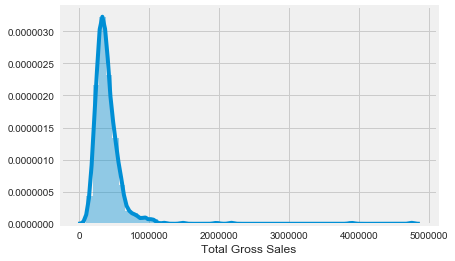

In [185]:
#Gross Sales deviates from normal distribution, has appreciable positive right skewness, and shows peakedness (leptokurtic)
sns.distplot(marketing_data['Total Gross Sales'])

#skewness and kurtosis: a perfectly symmetrical dataset with normal distribution has a skewness and kurtosis of 0. 
print("Skewness: %f" % marketing_data['Total Gross Sales'].skew())
print("Kurtosis: %f" % marketing_data['Total Gross Sales'].kurt())

Skewness: 5.873152
Kurtosis: 41.384732


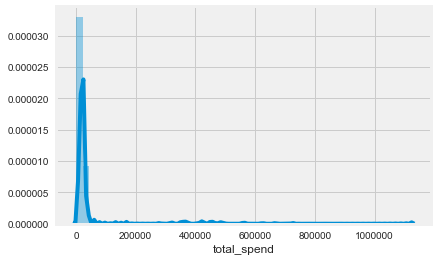

In [186]:
#Total spend deviates from normal distribution, has appreciable positive right skewness, and shows peakedness (leptokurtic)
sns.distplot(marketing_data['total_spend'])

#skewness and kurtosis: a perfectly symmetrical dataset with normal distribution has a skewness and kurtosis of 0. 
print("Skewness: %f" % marketing_data['total_spend'].skew())
print("Kurtosis: %f" % marketing_data['total_spend'].kurt())

Skewness: 0.732681
Kurtosis: 1.143179


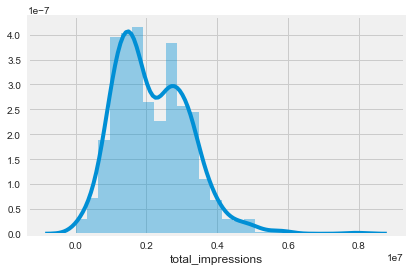

In [187]:
#Total impressions is closest to normal distribution, has a slight positive right skewness, and shows slight peakedness (leptokurtic)
sns.distplot(marketing_data['total_impressions'])

#skewness and kurtosis: a perfectly symmetrical dataset with normal distribution has a skewness and kurtosis of 0. 
print("Skewness: %f" % marketing_data['total_impressions'].skew())
print("Kurtosis: %f" % marketing_data['total_impressions'].kurt())

Skewness: 2.415417
Kurtosis: 16.522856


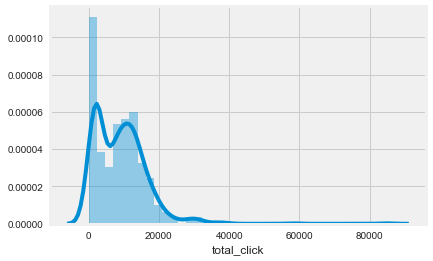

In [188]:
#Total clicks is closer to a normal distribution than gross sales and total spend, has appreciable positive right skewness, and shows peakedness (leptokurtic)
sns.distplot(marketing_data['total_click'])

#skewness and kurtosis: a perfectly symmetrical dataset with normal distribution has a skewness and kurtosis of 0. 
print("Skewness: %f" % marketing_data['total_click'].skew())
print("Kurtosis: %f" % marketing_data['total_click'].kurt())

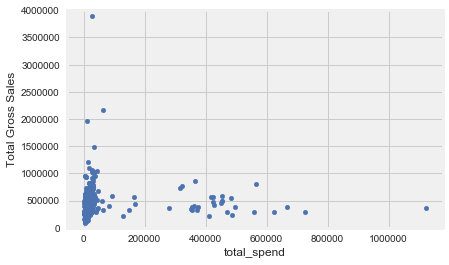

In [189]:
data = pd.concat([marketing_data['Total Gross Sales'], marketing_data['total_spend']], axis=1)
data.plot.scatter(x='total_spend', y='Total Gross Sales', ylim=(0,4000000));

y=0.239599x+(398933.504196)


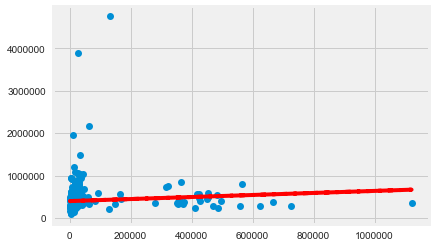

In [190]:
x = marketing_data['total_spend']
y = marketing_data['Total Gross Sales']

# plot the data itself
pl.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pl.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

y=3.458965x+(2047216.130993)


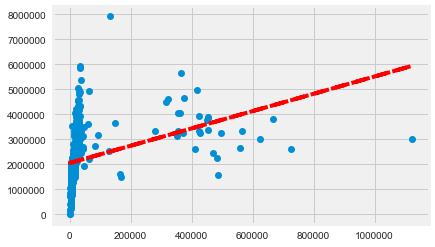

In [191]:
x = marketing_data['total_spend']
y = marketing_data['total_impressions']

# plot the data itself
pl.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pl.plot(x,p(x),"r--")
# the line equation:

print "y=%.6fx+(%.6f)"%(z[0],z[1])

The relationship between impression and click is linear. 

y=0.004992x+(-1683.382743)


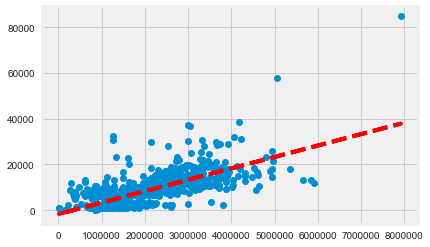

In [192]:
x = marketing_data['total_impressions']
y = marketing_data['total_click']

# plot the data itself
pl.plot(x,y,'o')

# calc the trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
pl.plot(x,p(x),"r--")
# the line equation:
print "y=%.6fx+(%.6f)"%(z[0],z[1])

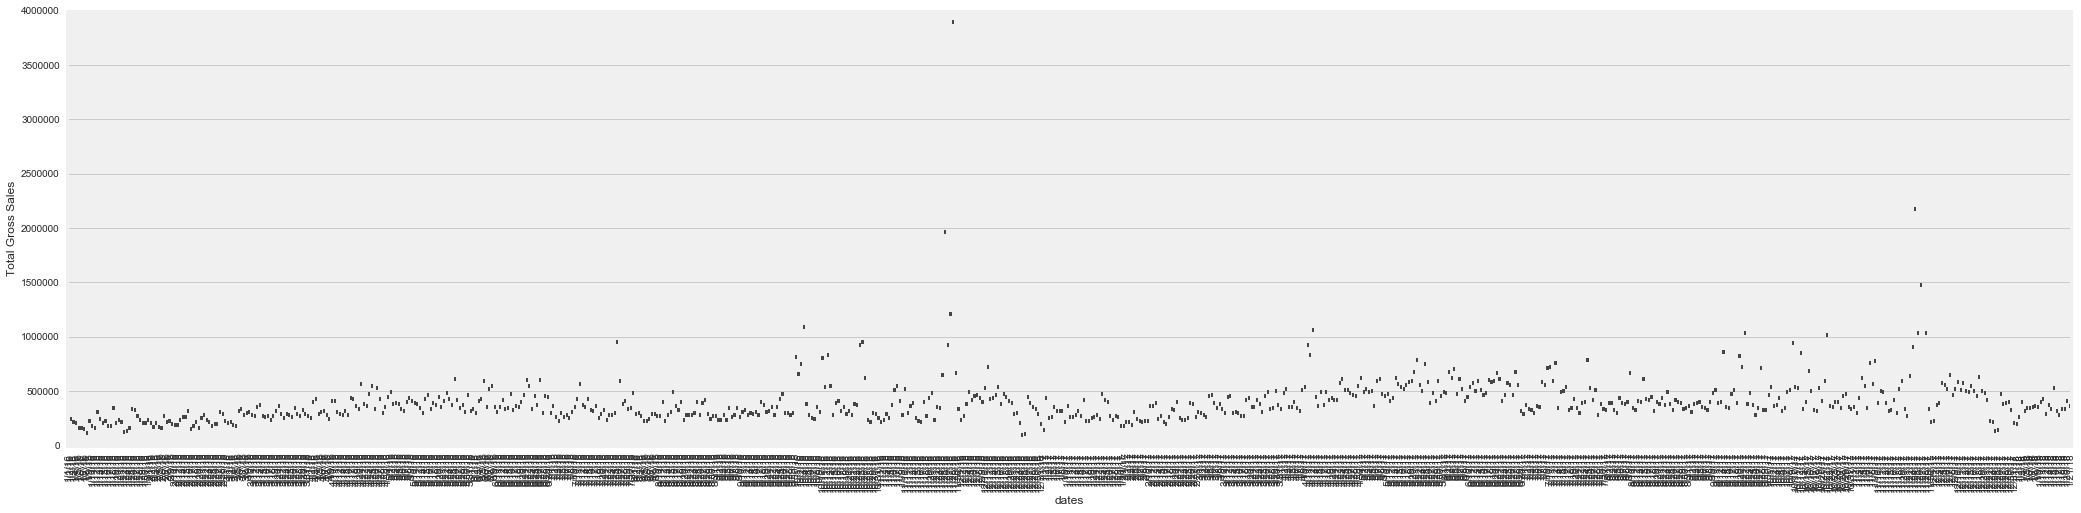

In [193]:
data = pd.concat([marketing_data['Total Gross Sales'], marketing_data['dates']], axis=1)
f, ax = plt.subplots(figsize=(32, 8))
fig = sns.boxplot(x='dates', y='Total Gross Sales', data=data)
fig.axis(ymin=0, ymax=4000000);
plt.xticks(rotation=90);

#### 'Total Gross Sales' related to 'Total Gross Orders', 'Total Click','click_email', and 'click_paid_search'. 

Guideshop Traffic ('impressions_guideshop') related to 'Guideshop Sales' and 'Guideshop Orders'
Catalog Impressions ('impressions_catalog') related to 'spend_catalog' and 'total_spend'


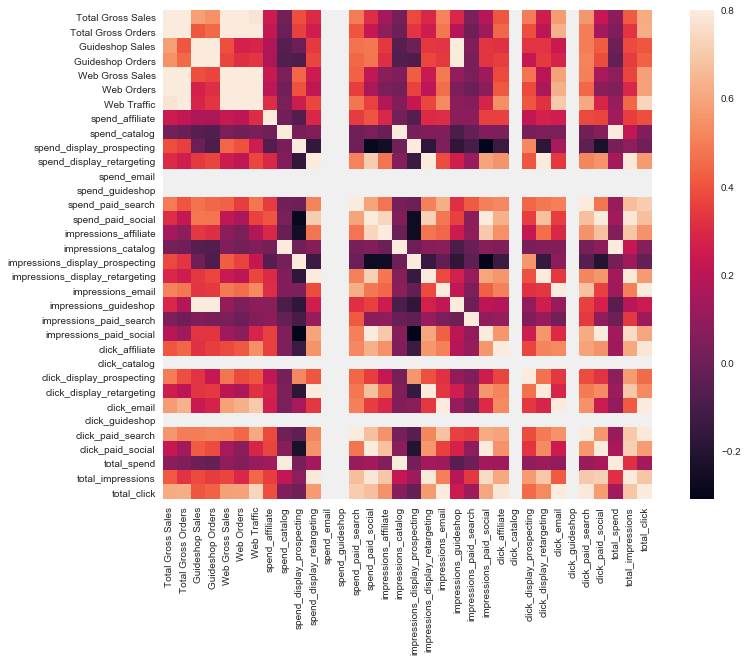

In [194]:
#correlation matrix
corrmat = marketing_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

Gross Sales is most correlated with total_click, click_paid_search, and impressions_emails which means that those variables probably have the most impact. 

We'll 

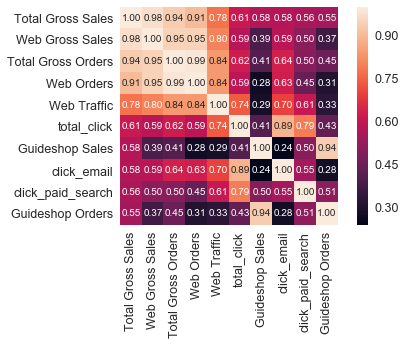

In [195]:
 #saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Total Gross Sales')['Total Gross Sales'].index
cm = np.corrcoef(marketing_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

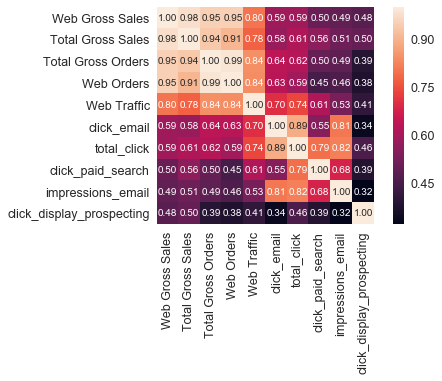

In [216]:
 #saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Web Gross Sales')['Web Gross Sales'].index
cm = np.corrcoef(marketing_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

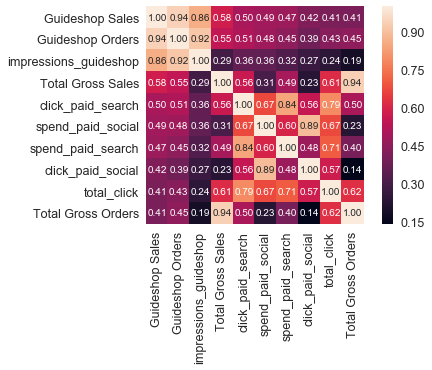

In [217]:
 #saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Guideshop Sales')['Guideshop Sales'].index
cm = np.corrcoef(marketing_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

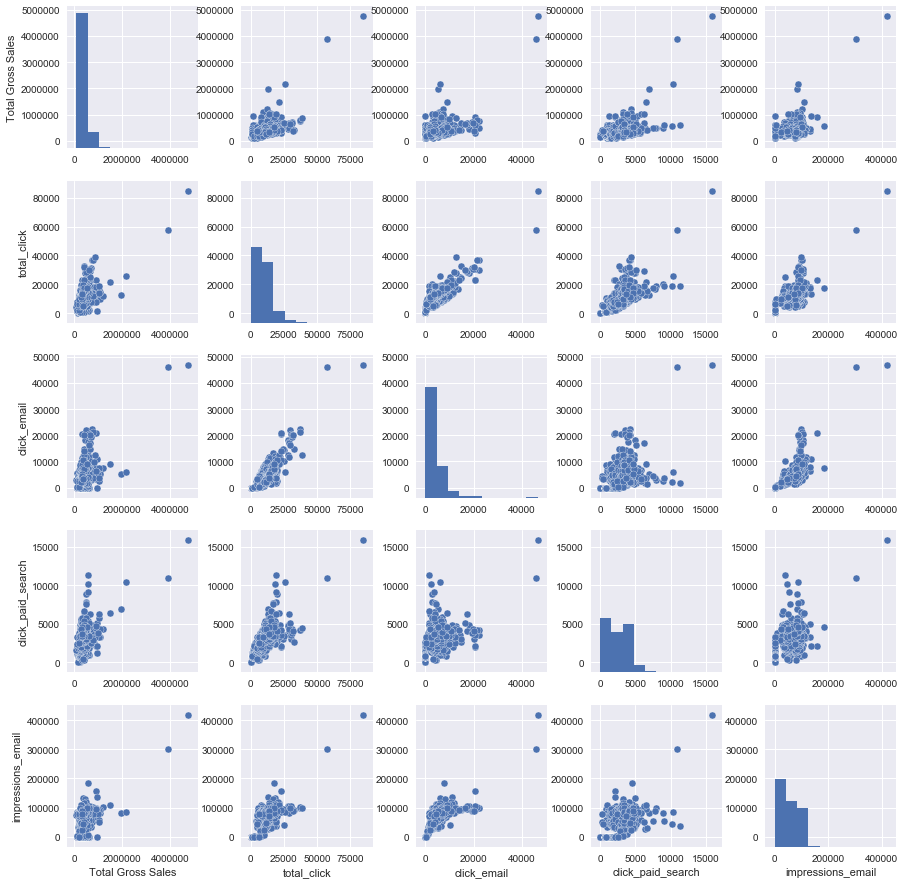

In [196]:
#scatterplot
sns.set()
cols = ['Total Gross Sales','total_click','click_email','click_paid_search','impressions_email']
sns.pairplot(marketing_data[cols], size = 2.5)
plt.show();

In [197]:
#There are no null values in our dataset
total = marketing_data.isnull().sum().sort_values(ascending=False)
percent = (marketing_data.isnull().sum()/marketing_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
total_click,0,0.0
total_impressions,0,0.0
spend_paid_search,0,0.0
spend_guideshop,0,0.0
spend_email,0,0.0
spend_display_retargeting,0,0.0
spend_display_prospecting,0,0.0
spend_catalog,0,0.0
spend_affiliate,0,0.0
Web Traffic,0,0.0


In [198]:
#standardizing data
gross_sales_scaled = StandardScaler().fit_transform(marketing_data['Total Gross Sales'][:,np.newaxis]);
low_range = gross_sales_scaled[gross_sales_scaled[:,0].argsort()][:10]
high_range= gross_sales_scaled[gross_sales_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.13455634]
 [-1.08631678]
 [-1.07090695]
 [-1.03105032]
 [-1.00145369]
 [-0.99864487]
 [-0.95568857]
 [-0.95200098]
 [-0.92257139]
 [-0.91393865]]

outer range (high) of the distribution:
[[  2.29553816]
 [  2.29774139]
 [  2.3972953 ]
 [  2.50143379]
 [  2.94762096]
 [  3.91739812]
 [  5.68360828]
 [  6.46481751]
 [ 12.75059922]
 [ 15.90223931]]


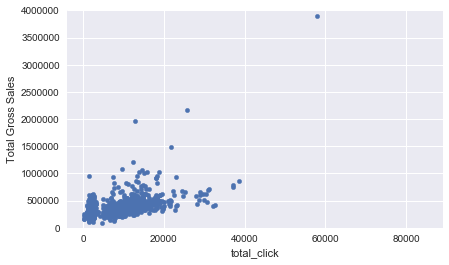

In [199]:
#bivariate analysis total gross sales/total_click
var = 'total_click'
data = pd.concat([marketing_data['Total Gross Sales'], marketing_data[var]], axis=1)
data.plot.scatter(x=var, y='Total Gross Sales', ylim=(0,4000000));

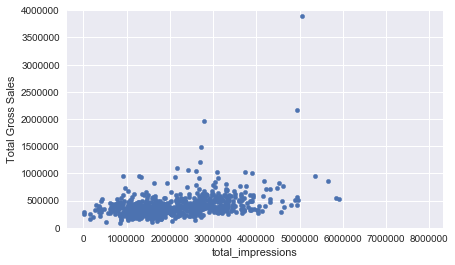

In [200]:
#bivariate analysis total gross sales/total_impressions
var = 'total_impressions'
data = pd.concat([marketing_data['Total Gross Sales'], marketing_data[var]], axis=1)
data.plot.scatter(x=var, y='Total Gross Sales', ylim=(0,4000000));

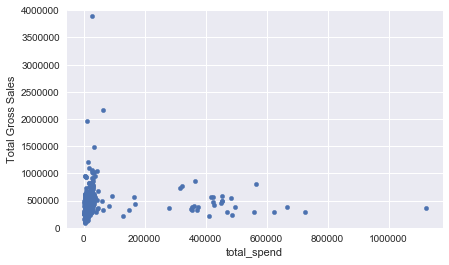

In [201]:
#bivariate analysis total gross sales/total_spend
var = 'total_spend'
data = pd.concat([marketing_data['Total Gross Sales'], marketing_data[var]], axis=1)
data.plot.scatter(x=var, y='Total Gross Sales', ylim=(0,4000000));

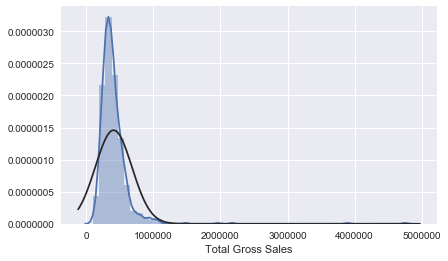

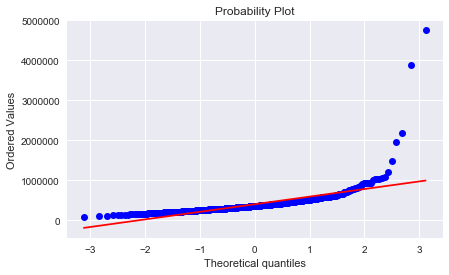

In [202]:
#total gross sales histogram and normal probability plot
sns.distplot(marketing_data['Total Gross Sales'], fit=norm);
fig = plt.figure()
res = stats.probplot(marketing_data['Total Gross Sales'], plot=plt)

In [203]:
#applying log transformation on total gross sales
marketing_data['Transformed Gross Sales'] = np.log(marketing_data['Total Gross Sales'])

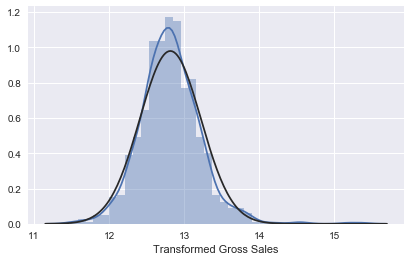

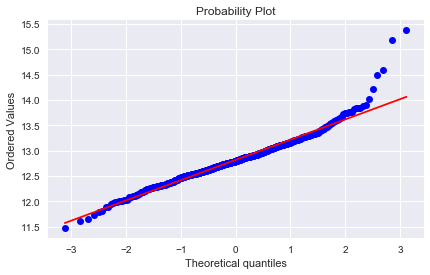

In [204]:
#transformed sales histogram and normal probability plot
sns.distplot(marketing_data['Transformed Gross Sales'], fit=norm);
fig = plt.figure()
res = stats.probplot(marketing_data['Transformed Gross Sales'], plot=plt)

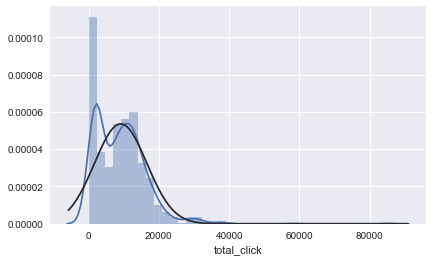

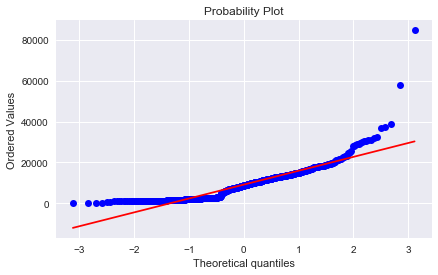

In [205]:
#total click histogram and normal probability plot
sns.distplot(marketing_data['total_click'], fit=norm);
fig = plt.figure()
res = stats.probplot(marketing_data['total_click'], plot=plt)

In [206]:
#applying log transformation on total click
marketing_data['transformed_click'] = np.log(marketing_data['total_click'])

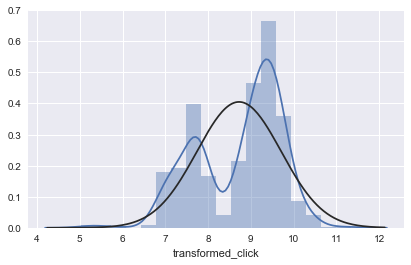

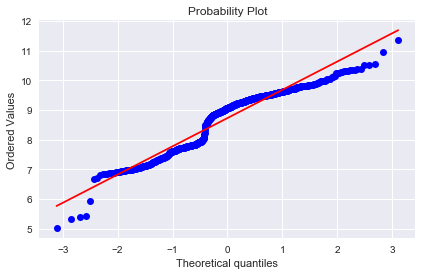

In [207]:
#transformed click histogram and normal probability plot
sns.distplot(marketing_data['transformed_click'], fit=norm);
fig = plt.figure()
res = stats.probplot(marketing_data['transformed_click'], plot=plt)

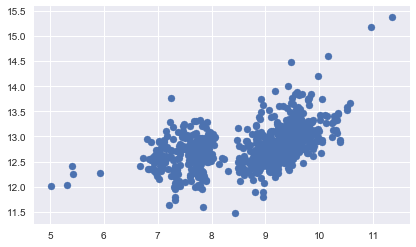

In [208]:
#scatter plot of transformed clicks and gross sales
plt.scatter(marketing_data['transformed_click'], marketing_data['Transformed Gross Sales']);

# 3. Model Fitting

## Total Gross Sales

In [209]:
#dropped variables with all zeros: click_guideshop, click_catalog, spend_email, spend_guideshop
#total gross sales vs click, impression, and spend variables

X = marketing_data[['click_affiliate',
       'click_display_prospecting', 'click_display_retargeting',
       'click_email','click_paid_search',
       'click_paid_social','impressions_affiliate',
       'impressions_catalog', 'impressions_display_prospecting',
       'impressions_display_retargeting', 'impressions_email',
       'impressions_guideshop', 'impressions_paid_search',
       'impressions_paid_social','spend_affiliate',
       'spend_catalog', 'spend_display_prospecting',
       'spend_display_retargeting',
       'spend_paid_search', 'spend_paid_social']] ## X usually means our input variables (or independent variables)
y = marketing_data["Total Gross Sales"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Total Gross Sales   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     64.92
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          5.50e-147
Time:                        14:49:46   Log-Likelihood:                -10097.
No. Observations:                 752   AIC:                         2.024e+04
Df Residuals:                     731   BIC:                         2.033e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.107e+05   2.53e+04     -4.379      0.000    -1.6e+05   -6.11e+04
click_affiliate                    18.6204      5.467      3.406      0.001       7.887      29.354
click_display_prospecting          45.2211     81.075      0.558      0.577    -113.947     204.389
click_display_retargeting         -55.9028     38.514     -1.452      0.147    -131.514      19.708
click_email                        20.0352      2.565      7.811      0.000      14.999      25.071
click_paid_search                  74.6898      8.606      8.679      0.000      57.795      91.585
click_paid_social                  -0.5629     13.682     -0.041      0.967     -27.424      26.299
impressions_affiliate              -0.1717      0.031     -5.500      0.000      -0.233      -0.110
impressions_catalog                 0.2013      0.141      1.427      0.154      -0.076       0.478
impressions_display_prospecting     0.2118      0.068      3.134      0.002       0.079       0.345
impressions_display_retargeting    -0.8607      0.195     -4.408      0.000      -1.244      -0.477
impressions_email                  -0.4210      0.298     -1.415      0.158      -1.005       0.163
impressions_guideshop              37.4457      5.875      6.374      0.000      25.912      48.979
impressions_paid_search            -0.0662      0.032     -2.090      0.037      -0.128      -0.004
impressions_paid_social            -0.2034      0.047     -4.308      0.000      -0.296      -0.111
spend_affiliate                     1.4761      0.810      1.823      0.069      -0.114       3.066
spend_catalog                      -0.3734      0.282     -1.326      0.185      -0.926       0.179
spend_display_prospecting           6.8600     16.942      0.405      0.686     -26.401      40.121
spend_display_retargeting         237.7445     53.482      4.445      0.000     132.748     342.741
spend_paid_search                  -6.0891      4.059     -1.500      0.134     -14.058       1.880
spend_paid_social                  23.9435      6.454      3.710      0.000      11.273      36.614
==============================================================================
Omnibus:                      476.314   Durbin-Watson:                   0.928
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12890.219
Skew:                           2.377   Prob(JB):                         0.00
Kurtosis:                      22.718   Cond. No.                     4.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+06. This might indicate that there are
strong multicollinearity o

## Web Gross Sales

In [212]:
#dropped variables with all zeros: click_guideshop, click_catalog, spend_email, spend_guideshop
#web gross sales vs click, impression, and spend variables

X = marketing_data[['click_affiliate',
       'click_display_prospecting', 'click_display_retargeting',
       'click_email','click_paid_search',
       'click_paid_social','impressions_affiliate',
       'impressions_catalog', 'impressions_display_prospecting',
       'impressions_display_retargeting', 'impressions_email',
       'impressions_guideshop', 'impressions_paid_search',
       'impressions_paid_social','spend_affiliate',
       'spend_catalog', 'spend_display_prospecting',
       'spend_display_retargeting',
       'spend_paid_search', 'spend_paid_social']] ## X usually means our input variables (or independent variables)
y = marketing_data['Web Gross Sales'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Web Gross Sales   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     59.05
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          1.16e-137
Time:                        14:49:46   Log-Likelihood:                -10027.
No. Observations:                 752   AIC:                         2.010e+04
Df Residuals:                     731   BIC:                         2.019e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -9.438e+04    2.3e+04     -4.098      0.000    -1.4e+05   -4.92e+04
click_affiliate                    17.7102      4.981      3.556      0.000       7.932      27.489
click_display_prospecting           5.5493     73.860      0.075      0.940    -139.454     150.552
click_display_retargeting         -45.7770     35.086     -1.305      0.192    -114.659      23.105
click_email                        19.3878      2.337      8.297      0.000      14.800      23.975
click_paid_search                  73.3035      7.840      9.350      0.000      57.912      88.695
click_paid_social                  -6.6024     12.465     -0.530      0.596     -31.073      17.869
impressions_affiliate              -0.1703      0.028     -5.987      0.000      -0.226      -0.114
impressions_catalog                 0.1873      0.129      1.457      0.145      -0.065       0.440
impressions_display_prospecting     0.1813      0.062      2.944      0.003       0.060       0.302
impressions_display_retargeting    -0.7182      0.178     -4.038      0.000      -1.067      -0.369
impressions_email                  -0.3637      0.271     -1.341      0.180      -0.896       0.169
impressions_guideshop              -3.8465      5.352     -0.719      0.473     -14.353       6.660
impressions_paid_search            -0.0646      0.029     -2.239      0.025      -0.121      -0.008
impressions_paid_social            -0.1893      0.043     -4.402      0.000      -0.274      -0.105
spend_affiliate                     1.4378      0.738      1.949      0.052      -0.010       2.886
spend_catalog                      -0.3489      0.256     -1.360      0.174      -0.852       0.155
spend_display_prospecting          10.1672     15.435      0.659      0.510     -20.134      40.468
spend_display_retargeting         200.7514     48.722      4.120      0.000     105.099     296.404
spend_paid_search                  -7.7927      3.698     -2.107      0.035     -15.053      -0.533
spend_paid_social                  21.0624      5.880      3.582      0.000       9.519      32.606
==============================================================================
Omnibus:                      503.259   Durbin-Watson:                   0.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16231.206
Skew:                           2.517   Prob(JB):                         0.00
Kurtosis:                      25.196   Cond. No.                     4.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+06. This might indicate that there are
strong multicollinearity o

## Guideshop Gross Sales

In [213]:
#dropped variables with all zeros: click_guideshop, click_catalog, spend_email, spend_guideshop
#guideshop gross sales vs click, impression, and spend variables

X = marketing_data[['click_affiliate',
       'click_display_prospecting', 'click_display_retargeting',
       'click_email','click_paid_search',
       'click_paid_social','impressions_affiliate',
       'impressions_catalog', 'impressions_display_prospecting',
       'impressions_display_retargeting', 'impressions_email',
       'impressions_guideshop', 'impressions_paid_search',
       'impressions_paid_social','spend_affiliate',
       'spend_catalog', 'spend_display_prospecting',
       'spend_display_retargeting',
       'spend_paid_search', 'spend_paid_social']] ## X usually means our input variables (or independent variables)
y = marketing_data['Guideshop Sales'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Guideshop Sales   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     195.0
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          6.70e-277
Time:                        14:49:46   Log-Likelihood:                -8699.3
No. Observations:                 752   AIC:                         1.744e+04
Df Residuals:                     731   BIC:                         1.754e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.632e+04   3939.568     -4.144      0.000   -2.41e+04   -8589.859
click_affiliate                     0.9102      0.852      1.068      0.286      -0.763       2.583
click_display_prospecting          39.6718     12.635      3.140      0.002      14.867      64.477
click_display_retargeting         -10.1258      6.002     -1.687      0.092     -21.909       1.658
click_email                         0.6474      0.400      1.619      0.106      -0.137       1.432
click_paid_search                   1.3863      1.341      1.034      0.302      -1.247       4.019
click_paid_social                   6.0395      2.132      2.832      0.005       1.853      10.226
impressions_affiliate              -0.0014      0.005     -0.292      0.770      -0.011       0.008
impressions_catalog                 0.0140      0.022      0.638      0.524      -0.029       0.057
impressions_display_prospecting     0.0305      0.011      2.897      0.004       0.010       0.051
impressions_display_retargeting    -0.1425      0.030     -4.682      0.000      -0.202      -0.083
impressions_email                  -0.0573      0.046     -1.235      0.217      -0.148       0.034
impressions_guideshop              41.2921      0.916     45.102      0.000      39.495      43.090
impressions_paid_search            -0.0016      0.005     -0.321      0.748      -0.011       0.008
impressions_paid_social            -0.0141      0.007     -1.913      0.056      -0.029       0.000
spend_affiliate                     0.0383      0.126      0.303      0.762      -0.209       0.286
spend_catalog                      -0.0245      0.044     -0.558      0.577      -0.111       0.062
spend_display_prospecting          -3.3072      2.640     -1.253      0.211      -8.491       1.876
spend_display_retargeting          36.9931      8.335      4.438      0.000      20.630      53.356
spend_paid_search                   1.7037      0.633      2.693      0.007       0.462       2.946
spend_paid_social                   2.8811      1.006      2.864      0.004       0.906       4.856
==============================================================================
Omnibus:                       73.880   Durbin-Watson:                   0.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              271.504
Skew:                           0.398   Prob(JB):                     1.11e-59
Kurtosis:                       5.834   Cond. No.                     4.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+06. This might indicate that there are
strong multicollinearity o

In [214]:
#dropped variables with all zeros: click_guideshop, click_catalog, spend_email, spend_guideshop
#guideshop gross sales vs click, impression, and spend variables

X = marketing_data[['click_affiliate',
       'click_display_prospecting', 'click_display_retargeting',
       'click_email','click_paid_search',
       'click_paid_social','impressions_affiliate',
       'impressions_catalog', 'impressions_display_prospecting',
       'impressions_display_retargeting', 'impressions_email',
       'impressions_guideshop', 'impressions_paid_search',
       'impressions_paid_social','spend_affiliate',
       'spend_catalog', 'spend_display_prospecting',
       'spend_display_retargeting',
       'spend_paid_search', 'spend_paid_social']] ## X usually means our input variables (or independent variables)
y = marketing_data['Web Traffic'] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Web Traffic   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     97.29
Date:                Thu, 25 Jan 2018   Prob (F-statistic):          1.91e-190
Time:                        14:49:46   Log-Likelihood:                -7603.9
No. Observations:                 752   AIC:                         1.525e+04
Df Residuals:                     731   BIC:                         1.535e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            1.689e+04    917.945     18.399      0.000    1.51e+04    1.87e+04
click_affiliate                     1.2220      0.199      6.155      0.000       0.832       1.612
click_display_prospecting          -4.7853      2.944     -1.625      0.105     -10.565       0.994
click_display_retargeting          -0.2004      1.399     -0.143      0.886      -2.946       2.545
click_email                         1.5776      0.093     16.937      0.000       1.395       1.760
click_paid_search                   4.7826      0.312     15.305      0.000       4.169       5.396
click_paid_social                   0.7193      0.497      1.448      0.148      -0.256       1.695
impressions_affiliate              -0.0091      0.001     -8.006      0.000      -0.011      -0.007
impressions_catalog                 0.0051      0.005      0.996      0.320      -0.005       0.015
impressions_display_prospecting     0.0048      0.002      1.939      0.053    -5.9e-05       0.010
impressions_display_retargeting     0.0010      0.007      0.146      0.884      -0.013       0.015
impressions_email                  -0.0885      0.011     -8.189      0.000      -0.110      -0.067
impressions_guideshop              -1.0571      0.213     -4.955      0.000      -1.476      -0.638
impressions_paid_search            -0.0044      0.001     -3.799      0.000      -0.007      -0.002
impressions_paid_social            -0.0088      0.002     -5.162      0.000      -0.012      -0.005
spend_affiliate                     0.0670      0.029      2.277      0.023       0.009       0.125
spend_catalog                      -0.0103      0.010     -1.005      0.315      -0.030       0.010
spend_display_prospecting           0.2259      0.615      0.367      0.714      -0.982       1.434
spend_display_retargeting           0.1059      1.942      0.055      0.957      -3.707       3.919
spend_paid_search                  -0.6241      0.147     -4.234      0.000      -0.913      -0.335
spend_paid_social                   0.8068      0.234      3.442      0.001       0.347       1.267
==============================================================================
Omnibus:                      370.934   Durbin-Watson:                   1.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2672.659
Skew:                           2.113   Prob(JB):                         0.00
Kurtosis:                      11.212   Cond. No.                     4.92e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.92e+06. This might indicate that there are
strong multicollinearity o